In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Attention
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Define your dataset directory and other parameters
dataset_dir = 'G:\Data\TB\TB_Chest_Radiography_Database'  # Adjust the dataset directory
image_size = (224, 224)
batch_size = 32
num_classes = 2  # Number of classes in your dataset (e.g., Normal and Tuberculosis)


In [3]:
# Create data generators for training and validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Adjust validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [4]:
# Define input layer
input_layer = Input(shape=(224, 224, 3))  # Adjust input shape based on your data

# CNN layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)

# Attention layer
att = Attention()([pool2, pool2])  # Self-attention mechanism

# Global Average Pooling layer
gap = GlobalAveragePooling2D()(att)

# Fully connected layers
fc1 = Dense(128, activation='relu')(gap)
output_layer = Dense(num_classes, activation='softmax')(fc1)  # Adjust num_classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 109, 109, 64)         18496     ['max_pooling2d[0][0]']   

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model using train_generator and validate using test_generator
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
105/105 [==============================] - 381s 3s/step - loss: 0.3733 - accuracy: 0.8619 - val_loss: 0.5153 - val_accuracy: 0.8571
Epoch 2/10
105/105 [==============================] - 321s 3s/step - loss: 0.2905 - accuracy: 0.9119 - val_loss: 0.4105 - val_accuracy: 0.8595
Epoch 3/10
105/105 [==============================] - 351s 3s/step - loss: 0.2415 - accuracy: 0.9211 - val_loss: 0.3544 - val_accuracy: 0.8595
Epoch 4/10
105/105 [==============================] - 315s 3s/step - loss: 0.2223 - accuracy: 0.9262 - val_loss: 0.3144 - val_accuracy: 0.8655
Epoch 5/10
105/105 [==============================] - 318s 3s/step - loss: 0.2081 - accuracy: 0.9295 - val_loss: 0.2882 - val_accuracy: 0.8667
Epoch 6/10
105/105 [==============================] - 325s 3s/step - loss: 0.1743 - accuracy: 0.9342 - val_loss: 0.2680 - val_accuracy: 0.8667
Epoch 7/10
105/105 [==============================] - 332s 3s/step - loss: 0.1674 - accuracy: 0.9390 - val_loss: 0.1767 - val_accuracy: 0.9179

In [8]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes


27/27 [==============================] - 29s 1s/step


In [9]:
# Print classification report
report = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Tuberculosis'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      0.96      0.89       700
Tuberculosis       0.09      0.02      0.03       140

    accuracy                           0.80       840
   macro avg       0.46      0.49      0.46       840
weighted avg       0.71      0.80      0.75       840



In [10]:
# Generate and print the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(confusion)



Confusion Matrix:
[[669  31]
 [137   3]]


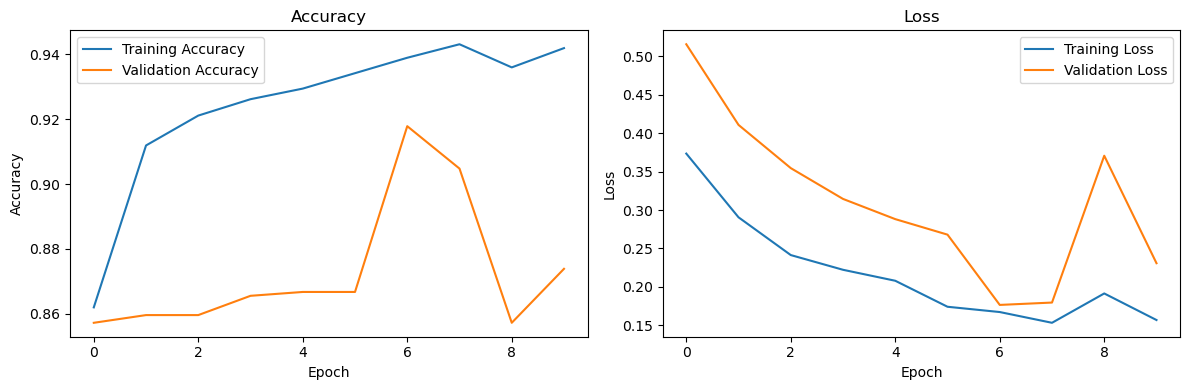

In [11]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()
